# IF3070 Foundations of Artificial Intelligence | Tugas Kecil 2



Group Number: 21

Group Members:
- Muhammad Daffa Kusuma Atmaja 18222108
- Ahmad Fawwazi 18222117

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import other libraries if needed
from ucimlrepo import fetch_ucirepo

# Atur tampilan Pandas
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.max_rows', 20)      # Menampilkan lebih sedikit baris (default 20)
pd.set_option('display.width', 1000)       # Lebar tampilan




## Import Dataset

In [ ]:

# Path ke file train.csv yang ada di folder yang sama
file_path = 'train.csv'

# Membaca dataset
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset
print(df.head())

# Load Dataset
# Fetch dataset using ucimlrepo
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# Split data into features (X) and targets (y)
X = phiusiil_phishing_url_website.data.features
y = phiusiil_phishing_url_website.data.targets

# # Display metadata and variable information
print(phiusiil_phishing_url_website.metadata)
print(phiusiil_phishing_url_website.variables)


   id     FILENAME                                   URL  URLLength                        Domain  DomainLength  IsDomainIP  TLD  CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  NoOfSubDomain  HasObfuscation  NoOfObfuscatedChar  ObfuscationRatio  NoOfLettersInURL  LetterRatioInURL  NoOfDegitsInURL  DegitRatioInURL  NoOfEqualsInURL  NoOfQMarkInURL  NoOfAmpersandInURL  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  IsHTTPS  LineOfCode  LargestLineLength  HasTitle                Title  DomainTitleMatchScore  URLTitleMatchScore  HasFavicon  Robots  IsResponsive  NoOfURLRedirect  NoOfSelfRedirect  HasDescription  NoOfPopup  NoOfiFrame  HasExternalFormSubmit  HasSocialNet  HasSubmitButton  HasHiddenFields  HasPasswordField  Bank  Pay  Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef  label
0   1          NaN             https://www.northcm.ac.th       24.0             www.northcm.ac.th          17.0         0.0  NaN        

# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## A. Data Understanding
The objective of this section is for participants to understand the quality of the provided data. This includes:

1. Data Size
2. Statistics of Each Feature
3. Outliers
4. Correlation
5. Distribution

### Step 1

Find the following:

1. The size of the data (instances and features).
2. The data types of each feature.
3. The number of unique values for categorical features.
4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.
5. Explain the significance of gathering the first four pieces of information.

In [ ]:
# 1. The size of the data (instances and features).
rows, cols = df.shape
print(f"The dataset has {rows} rows and {cols} columns.")


The dataset has 140404 rows and 56 columns.


In [ ]:
# 2. The data types of each features:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)       
pd.set_option('display.max_rows', None)     

print("Data Types:")
print(df.dtypes)


Data Types:
id                              int64
FILENAME                       object
URL                            object
URLLength                     float64
Domain                         object
DomainLength                  float64
IsDomainIP                    float64
TLD                            object
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                     float64
NoOfSubDomain                 float64
HasObfuscation                float64
NoOfObfuscatedChar            float64
ObfuscationRatio              float64
NoOfLettersInURL              float64
LetterRatioInURL              float64
NoOfDegitsInURL               float64
DegitRatioInURL               float64
NoOfEqualsInURL               float64
NoOfQMarkInURL                float64
NoOfAmpersandInURL            float64
NoOfOtherSpecialCharsInURL    float64
SpacialCharRatioInURL         float64
IsHTTPS                       float64


In [ ]:
# 3. The number of unique values for categorical features.
categorical_cols = df.select_dtypes(include=['object']).columns

print("Number of unique values for categorical features:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}")


Number of unique values for categorical features:
FILENAME: 82872
URL: 96914
Domain: 69832
TLD: 497
Title: 79460


In [ ]:
# 4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.
numerical_cols = df.select_dtypes(include=['number']).columns

print(" The minimum, maximum, mean, median, and standard deviation values for non-categorical features:")

for col in numerical_cols:
    min_value = df[col].min()
    max_value = df[col].max()
    mean_value = df[col].mean()
    median_value = df[col].median()
    std_dev_value = df[col].std()
    
    print(f"{col}:")
    print(f"  Min: {min_value}")
    print(f"  Max: {max_value}")
    print(f"  Mean: {mean_value}")
    print(f"  Median: {median_value}")
    print(f"  Standard Deviation: {std_dev_value}\n")


 The minimum, maximum, mean, median, and standard deviation values for non-categorical features:
id:
  Min: 1
  Max: 235795
  Mean: 117682.63274550582
  Median: 117421.5
  Standard Deviation: 68122.00507977649

URLLength:
  Min: 14.0
  Max: 4054.0
  Mean: 27.70147307716417
  Median: 26.0
  Standard Deviation: 23.140675584728395

DomainLength:
  Min: 4.0
  Max: 93.0
  Mean: 19.619386724770155
  Median: 19.0
  Standard Deviation: 5.8338077783503515

IsDomainIP:
  Min: 0.0
  Max: 1.0
  Mean: 0.0004884303071005556
  Median: 0.0
  Standard Deviation: 0.022095173922045474

CharContinuationRate:
  Min: 0.0
  Max: 1.0
  Mean: 0.9180073037300187
  Median: 1.0
  Standard Deviation: 0.1591416069048732

TLDLegitimateProb:
  Min: 0.0
  Max: 0.5229071
  Mean: 0.2774819651860483
  Median: 0.5229071
  Standard Deviation: 0.24811547461974554

URLCharProb:
  Min: 0.001229244
  Max: 0.088765828
  Mean: 0.05928594172147442
  Median: 0.060263989
  Standard Deviation: 0.008062862038390652

TLDLength:
  Min:

In [ ]:
#5. Explain the significance of gathering the first four pieces of information.
#Gathering the first four pieces of information in Exploratory Data Analysis (EDA) is crucial for understanding the dataset's characteristics.
    #1. knowing the size of data set : membantu menilai kompleksitas dataset untuk menentukan pemilihan metode analisis datanya.
    #2. knowing the data types of each feature :membantu menentukan teknik analisis yang tepat, karena data numerik dan categorical memerlukan pendekatan yang beda.
    #3. knowing the number of unique values for categorical features : membantu memahami keragaman data dan pengaruhnya terhadap analisis.
    #4. knowing The minimum, maximum, mean, median, and standard deviation values for non-categorical features : Memberikan wawasan tentang distribusi data, apakah ada outlier, dan membantu memutuskan apakah perlu transformasi data.

### Step 2

Find the following:

1. Missing values for each feature.
2. Outliers for each feature (use the methods you are familiar with).
3. Why is it necessary to identify missing values and outliers?

In [ ]:
#1 Missing Values dor Each Features
missing_values = df.isnull().sum()
print(missing_values)


In [ ]:
#2. Outliers for each feature (use the methods you are familiar with).
# Fungsi untuk mendeteksi outliers dengan IQR
def detect_outliers_iqr(df):
    outliers = {}
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        # Menampilkan nilai IQR dan lower-upper bound
        print(f"Feature: {column}")
        print(f"Q1 (25th percentile): {Q1}")
        print(f"Q3 (75th percentile): {Q3}")
        print(f"IQR: {IQR}")
        print(f"Lower Bound: {lower_bound}")
        print(f"Upper Bound: {upper_bound}")
        
        # Jika tidak ada outlier
        if outliers[column].empty:
            print("---tidak ada outlier yg terdeteksi---\n")
        else:
            print(f"Outlier terdeteksi:\n{outliers[column][column].head()}\n")
        
        # Visualisasi boxplot untuk fitur tersebut
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column} with Outliers')
        plt.show()

    return outliers

outliers = detect_outliers_iqr(df)


In [ ]:
#3. Why is it necessary to identify missing values and outliers?
# Identify missing value dan outlier penting karena dapat mempengaruhi keakuratan analisis atau model.
# Missing value bisa menyebabkan data tidak lengkap, 
# Sedangkan outlier bisa mendistorsi hasil analisis dan model, terutama jika data sangat sensitif terhadap nilai ekstrim.
# Dengan mengetahui keduanya, kita dapat melakukan penanganan yang tepat agar hasil analisis data lebih optimal dan tentunya valid.

### Step 3

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.
4. Explain the significance of understanding feature distributions and correlations.

In [ ]:
# 1. Correlations between features.
# Menghitung korelasi antar fitur numerik
correlation_matrix = df.corr()

# Menampilkan matriks korelas
correlation_matrix

# # contoh menampilkan korelasi yang diinginkan saja
# feature_1 = 'URLLength' 
# feature_2 = 'DomainLength' 

# correlation_value = correlation_matrix.loc[feature_1, feature_2]
# print(f"Korelasi antara {feature_1} dan {feature_2}: {correlation_value}")



C:\Users\asus\AppData\Local\Temp\ipykernel_11248\137343510.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,id,URLLength,DomainLength,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
id,1.000000,-0.006493,-0.000968,-0.001687,0.002367,0.001894,-0.004329,0.003860,-0.001072,0.001039,-0.003835,0.000034,-0.003947,-0.002075,-0.000884,-0.003646,0.000922,0.003807,0.006643,-0.000337,-0.001352,0.003433,-0.003722,-0.007535,0.003840,0.003359,0.000974,0.007599,0.000169,-0.002389,0.001190,-0.000111,0.001022,-0.000315,0.002600,-0.004118,-0.001269,0.001492,0.000278,0.000154,-0.004420,-0.004164,0.000819,-0.003632,-0.000708,0.002246,-0.000522,0.005037,0.000219,-0.001404,0.001529
URLLength,-0.006493,1.000000,0.289682,0.204863,-0.124541,0.025708,-0.113507,0.058677,0.035948,0.278809,0.818319,0.200808,0.934413,0.232996,0.848270,0.358640,0.567762,0.451078,0.249567,0.918199,0.088722,-0.045880,-0.050316,0.025849,-0.079910,-0.106907,-0.182476,-0.061099,-0.033456,-0.068979,0.015044,-0.003101,-0.135346,-0.003718,-0.012332,-0.011161,-0.108312,-0.045765,-0.047006,0.006709,-0.008783,-0.015774,-0.014122,-0.071766,-0.031657,-0.038996,-0.032182,-0.066244,-0.008497,-0.029542,-0.222200
DomainLength,-0.000968,0.289682,1.000000,-0.025420,-0.299010,0.123278,-0.009943,0.124980,0.205520,0.021147,0.001108,0.017593,0.481225,0.801304,0.184768,0.185403,0.034522,0.053647,0.021156,0.154869,-0.055450,-0.067099,-0.033143,0.051455,-0.103018,-0.193203,-0.207139,-0.095839,-0.003646,-0.071420,-0.006020,-0.019837,-0.084513,-0.007250,0.000088,0.002061,-0.089895,-0.031670,-0.032446,0.009617,-0.017009,0.005047,-0.023233,-0.093662,-0.044093,-0.024564,-0.034124,-0.055177,-0.011112,-0.024578,-0.229585
IsDomainIP,-0.001687,0.204863,-0.025420,1.000000,-0.069108,-0.022281,-0.077555,-0.005212,0.051158,0.041227,0.067834,0.040336,0.134539,-0.006095,0.300134,0.163114,0.339595,0.423754,-0.000283,0.288181,0.084114,-0.047711,-0.010306,-0.002199,-0.031568,-0.031728,-0.031070,-0.021918,-0.017364,-0.015593,-0.000696,-0.003483,-0.030922,-0.001708,-0.006476,-0.006245,-0.041384,-0.028094,-0.020077,0.000646,-0.010412,-0.014882,-0.004032,-0.036001,-0.009589,-0.012179,-0.016464,-0.010751,-0.004083,-0.007852,-0.077831
CharContinuationRate,0.002367,-0.124541,-0.299010,-0.069108,1.000000,0.286157,0.227600,0.255948,-0.580155,-0.027554,-0.000259,-0.014896,-0.132395,-0.063559,-0.178424,-0.246589,-0.083011,-0.107077,-0.034281,-0.330078,-0.807311,0.148918,0.069688,-0.039257,0.161793,0.515947,0.517723,0.075850,0.084926,0.109179,-0.006460,0.003425,0.164588,0.002402,0.061200,0.033105,0.198676,0.107305,0.091226,0.069102,0.060321,0.098860,0.041899,0.170827,0.043894,-0.006395,0.088193,0.046358,0.012061,0.038281,0.343046
TLDLegitimateProb,0.001894,0.025708,0.123278,-0.022281,0.286157,1.000000,0.274783,0.546112,-0.375222,-0.007741,0.003921,-0.002093,0.059675,0.240391,-0.030231,-0.046766,-0.003954,-0.017316,-0.011201,-0.093364,-0.391997,0.030926,0.030115,0.002076,0.015766,0.431349,0.429219,-0.032892,0.039475,0.022500,0.017676,0.000073,0.100481,0.004252,0.119872,0.026437,0.069404,0.041195,0.049923,0.099364,0.072644,0.099965,0.032874,0.110946,0.037720,0.003678,0.035868,0.007764,0.006910,0.016975,0.059090
URLCharProb,-0.004329,-0.113507,-0.009943,-0.077555,0.227600,0.274783,1.000000,0.188279,-0.111008,-0.027790,-0.016451,-0.018353,-0.081648,0.143974,-0.255870,-0.484968,-0.090086,-0.124659,-0.035034,-0.258282,-0.286765,0.159966,0.049598,-0.035227,0.143180,0.179622,0.163005,0.072280,0.071172,0.108331,0.000589,-0.0

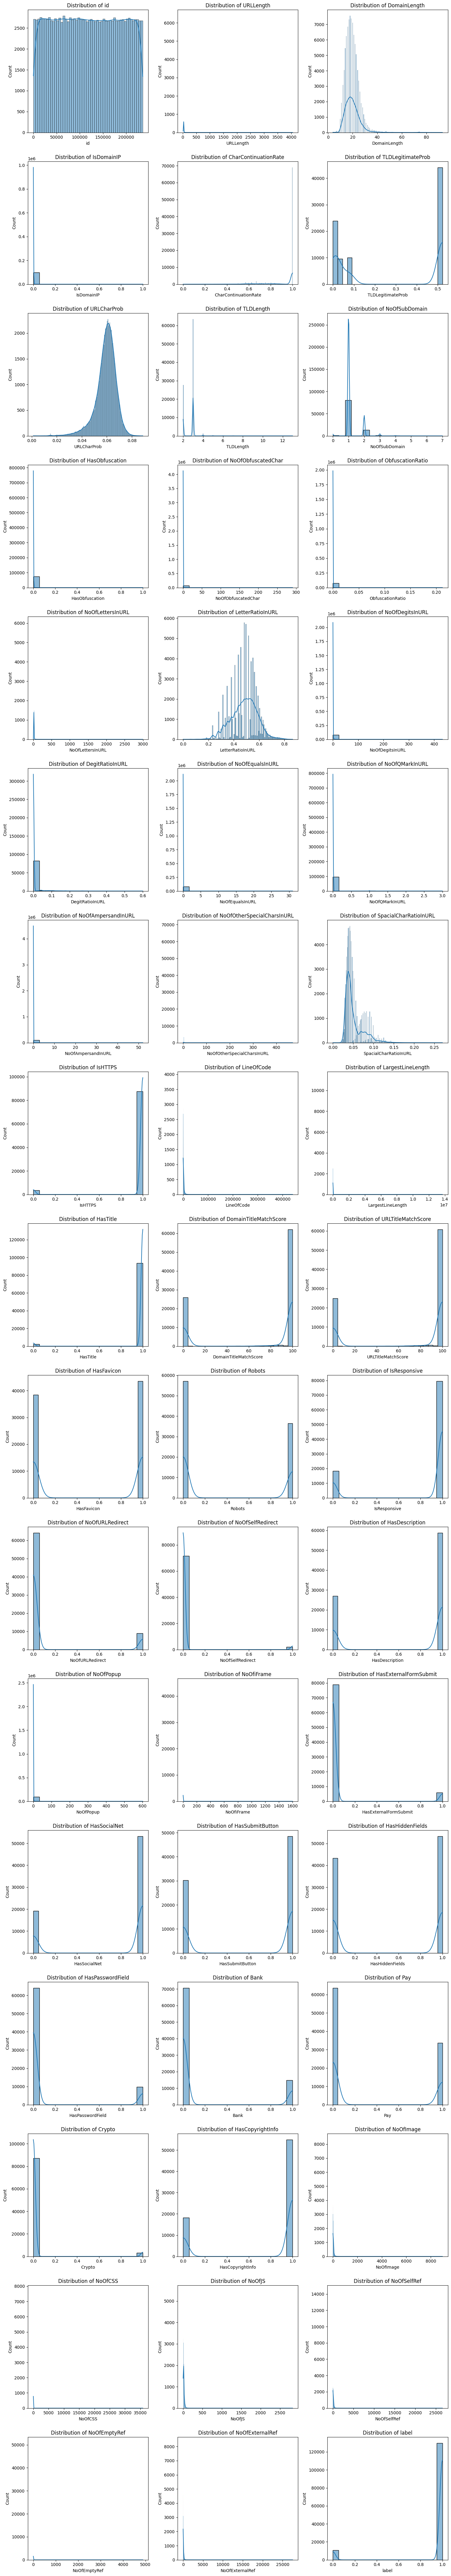

In [ ]:
# 2. Visualize the distribution of each feature (categorical and continuous).
# Fitur numerik yang ingin divisualisasikan
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Menentukan jumlah subplot yang diperlukan
n_features = len(numerical_features)
n_rows = (n_features // 3) + (n_features % 3 > 0)  # Menghitung jumlah baris
n_cols = min(3, n_features)  # Maksimal 3 kolom

# Visualisasi Histogram untuk setiap fitur numerik
plt.figure(figsize=(15, 5 * n_rows))  # Menyesuaikan ukuran figure agar proporsional
for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i+1)  # Menyesuaikan grid untuk jumlah fitur
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

C:\Users\Daffa\AppData\Local\Temp\ipykernel_6312\553498686.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


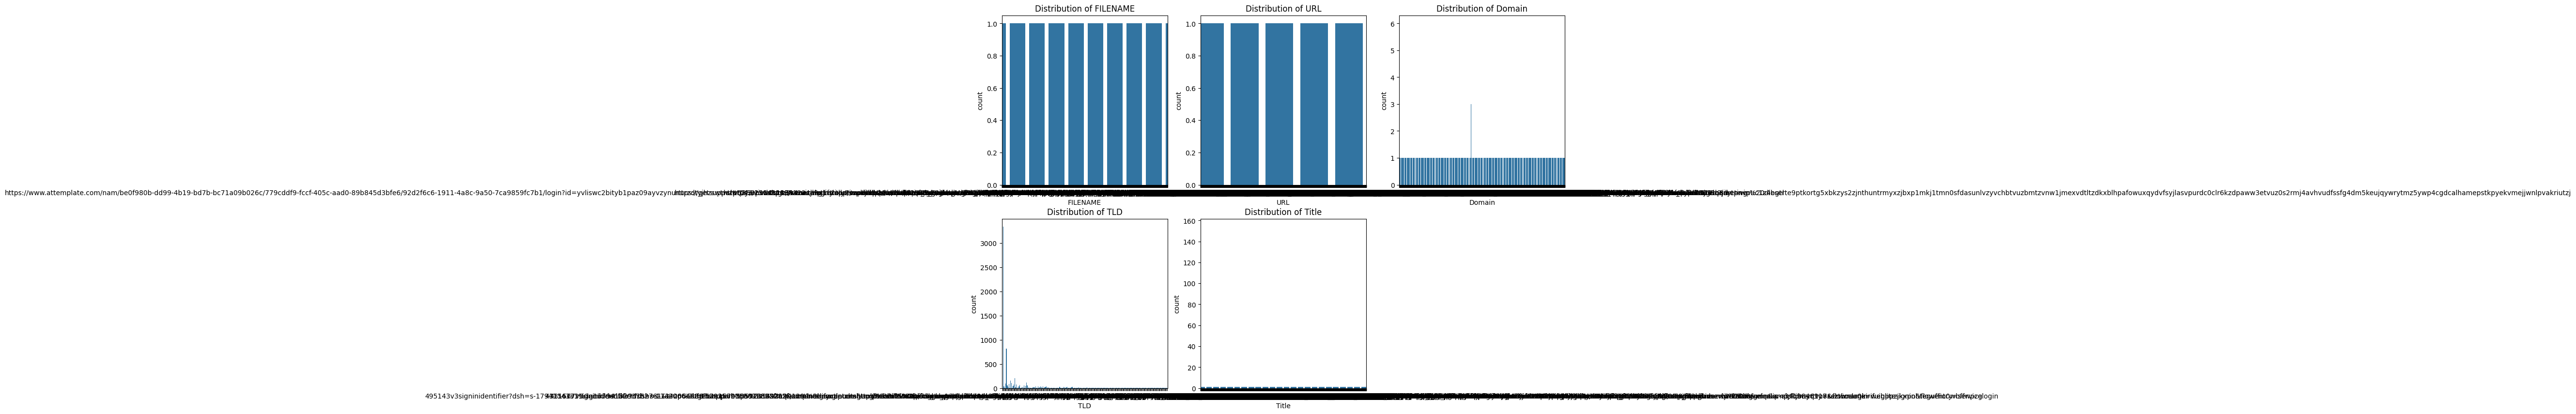

In [144]:
# Sampling data (mengambil 1000 baris acak untuk mengurangi beban memori)
df_sampled = df.sample(10000, random_state=42)

# Fitur kategorikal yang ingin divisualisasikan
categorical_features = df_sampled.select_dtypes(include=['object', 'bool']).columns

# Tentukan jumlah subplot yang dibutuhkan
n_features = len(categorical_features)
n_rows = (n_features // 3) + (n_features % 3 > 0)  # Menghitung jumlah baris
n_cols = min(3, n_features)  # Maksimal 3 kolom

# Menampilkan Countplot untuk setiap fitur kategorikal
plt.figure(figsize=(15, 5 * n_rows))  # Menyesuaikan ukuran figure agar proporsional
for i, feature in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i+1)  # Menyesuaikan grid untuk jumlah fitur
    sns.countplot(x=df_sampled[feature].dropna())
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## B. Data Insights

The objective of this section is for participants to understand how to formulate and get many insights from the given data so that we can improve the model performance. Given example questions:

1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?
2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?
3. How does website-resource-related features vary across phishing and non-phishing URLs?

### Step 1

Answer the three example questions by visualizing and explaining the insights for each question. Add markdown texts to explain the visualizations.

#### 1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?

In [ ]:
# Write your code here

#### 2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?

URL Characteristics:
- `URLLength`
- `Domain`
- `DomainLength`
- `IsDomainIP`
- `TLD`
- `TLDLength`
- `NoOfSubDomain`
- `HasObfuscation`
- `NoOfObfuscatedChar`
- `ObfuscationRatio`
- `NoOfLettersInURL`
- `LetterRatioInURL`
- `NoOfDegitsInURL`
- `DegitRatioInURL`
- `NoOfEqualsInURL`
- `NoOfQMarkInURL`
- `NoOfAmpersandInURL`
- `NoOfOtherSpecialCharsInURL`
- `SpacialCharRatioInURL`
- `CharContinuationRate`

In [ ]:
# Write your code here

#### 3. How does website-resource-related features vary across phishing and non-phishing URLs?

Website resource related features:
- `NoOfImage`
- `NoOfCSS`
- `NoOfJS`
- `NoOfSelfRef`
- `NoOfEmptyRef`
- `NoOfExternalRef`

In [ ]:
# Write your code here

### Step 2

Try to formulate three other new questions and answer them with the methods used before.

#### 4. Your first question (replace this heading)

In [ ]:
# Write your code here

#### 5. Your second question (replace this heading)

In [ ]:
# Write your code here

#### 6. Your third question (replace this heading)

In [ ]:
# Write your code here